In [1]:
from datascience import * #datascience library because we will use tables
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plots #We will use matplotlib library for plotting
plots.style.use('fivethirtyeight')

#To start with, let's import NLTK, the canonical library for NLP in Python
#NLTK has severl tokeniztion functions, we will use work_tokenize  
from nltk import *
from nltk import word_tokenize  
from nltk.corpus import stopwords
import nltk 
import string
#Punkt tokenizer is the magical unsupervised sentence boundary detection. 
#Punkt knows that the periods in Mr. Smith and Johann S. Bach do not mark sentence boundaries. 
nltk.download('punkt')

from urllib.request import urlopen 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wanghuaixin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import  matplotlib.figure

# 1. Prepare the Table

In [3]:
import xlrd
    

TC_workbook=xlrd.open_workbook(r"brexit.xlsx")

 #sheet
all_sheets_list=TC_workbook.sheet_names()
print("All sheets name in File:",all_sheets_list)
    
first_sheet=TC_workbook.sheet_by_index(0)

    
first_row=first_sheet.row_values(0)
first_col=first_sheet.col_values(0)
sec_col=first_sheet.col_values(1)
thi_col=first_sheet.col_values(2)
four_col=first_sheet.col_values(3)
five_col=first_sheet.col_values(4)
six_col=first_sheet.col_values(5)
sev_col=first_sheet.col_values(6)
eig_col=first_sheet.col_values(7)

All sheets name in File: ['Sheet1']


In [4]:
brexit = Table().with_columns("Headline",first_col,
                             "Location",sec_col,
                             "Snippet",thi_col,
                             "URL",four_col,
                             "Subject",five_col,
                             "Date in Number",six_col,
                             "Type",sev_col,
                             "ID",eig_col)
brexit = brexit.take(np.arange(1,brexit.num_rows))
brexit.show(2)

Headline,Location,Snippet,URL,Subject,Date in Number,Type,ID
What to Watch for in Europe in 2013,[ Europe'],"The economy, elections, and how to deal with a new Islam ...",https://rendezvous.blogs.nytimes.com/2013/01/01/what-to- ...,"[ Elections', New Year']",41275.0,Blog,50e2ea6100315214fbb81efa
David Cameronüs Losing Battle,"[ Great Britain', Luxembourg', Europe']",The British prime ministerüs case against Jean-Claude Ju ...,https://www.nytimes.com/2014/06/26/opinion/mr-camerons-l ...,"[ Elections', Editorials']",41815.0,Editorial,53aaa68638f0d86af25be96a


In [5]:
brexit_days = brexit.with_column("Days",brexit.apply(float,"Date in Number")-41274)
brexit_days.show(2)

Headline,Location,Snippet,URL,Subject,Date in Number,Type,ID,Days
What to Watch for in Europe in 2013,[ Europe'],"The economy, elections, and how to deal with a new Islam ...",https://rendezvous.blogs.nytimes.com/2013/01/01/what-to- ...,"[ Elections', New Year']",41275.0,Blog,50e2ea6100315214fbb81efa,1
David Cameronüs Losing Battle,"[ Great Britain', Luxembourg', Europe']",The British prime ministerüs case against Jean-Claude Ju ...,https://www.nytimes.com/2014/06/26/opinion/mr-camerons-l ...,"[ Elections', Editorials']",41815.0,Editorial,53aaa68638f0d86af25be96a,541


#I face a problem regarding Date Format. Does anyone know how can transfer number to yyyy-mm-dd foramt?

In [6]:
Date_Convert_read=xlrd.open_workbook(r"Data_Convert.xlsx")

 #sheet
all_sheets_list=Date_Convert_read.sheet_names()
print("All sheets name in File:",all_sheets_list)
    
first_sheet_1=Date_Convert_read.sheet_by_index(0)

first_col_1=first_sheet_1.col_values(0)
sec_col_1=first_sheet_1.col_values(1)
thi_col_1=first_sheet_1.col_values(2)
four_col_1= first_sheet_1.col_values(3)

All sheets name in File: ['Date']


In [7]:
Date_Convert = Table().with_columns("Days",first_col_1,
                             "Year",sec_col_1,
                             "Month",thi_col_1,
                             "Date", four_col_1)
Date_Convert.show(2)

Days,Year,Month,Date
1,2013,1,201301
2,2013,1,201301


In [8]:
brexit_date = brexit_days.join("Days",Date_Convert)
brexit_date.show(2)

Days,Headline,Location,Snippet,URL,Subject,Date in Number,Type,ID,Year,Month,Date
1,What to Watch for in Europe in 2013,[ Europe'],"The economy, elections, and how to deal with a new Islam ...",https://rendezvous.blogs.nytimes.com/2013/01/01/what-to- ...,"[ Elections', New Year']",41275.0,Blog,50e2ea6100315214fbb81efa,2013,1,201301
541,David Cameronüs Losing Battle,"[ Great Britain', Luxembourg', Europe']",The British prime ministerüs case against Jean-Claude Ju ...,https://www.nytimes.com/2014/06/26/opinion/mr-camerons-l ...,"[ Elections', Editorials']",41815.0,Editorial,53aaa68638f0d86af25be96a,2014,6,201406


In [9]:
type(brexit_date.column("Subject").item(0))

str

In [10]:
d_float = brexit_date.apply(float,"Date")

d_strs = make_array()
for i in d_float:
    d_str = str(int(i))
    d_strs = np.append(d_strs,d_str)
    
d_strs

brexit_date = brexit_date.with_column("Date",d_strs)
brexit_date.show(2)

Days,Headline,Location,Snippet,URL,Subject,Date in Number,Type,ID,Year,Month,Date
1,What to Watch for in Europe in 2013,[ Europe'],"The economy, elections, and how to deal with a new Islam ...",https://rendezvous.blogs.nytimes.com/2013/01/01/what-to- ...,"[ Elections', New Year']",41275.0,Blog,50e2ea6100315214fbb81efa,2013,1,201301
541,David Cameronüs Losing Battle,"[ Great Britain', Luxembourg', Europe']",The British prime ministerüs case against Jean-Claude Ju ...,https://www.nytimes.com/2014/06/26/opinion/mr-camerons-l ...,"[ Elections', Editorials']",41815.0,Editorial,53aaa68638f0d86af25be96a,2014,6,201406


In [11]:
brexit_date.pivot("Month","Year")

Year,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
2013,1,0,0,0,0,0,0,0,0,0,0,0
2014,0,0,0,0,0,2,0,0,2,0,0,0
2015,0,2,0,0,5,3,3,4,2,2,0,1
2016,2,16,12,26,25,215,205,50,60,82,125,59
2017,76,54,93,67,66,93,43,31,48,49,54,0


# 2. Visualizing Date Date

In [12]:
group_0 = brexit_date.group("Days")
group_1 = brexit_date.group("Date")

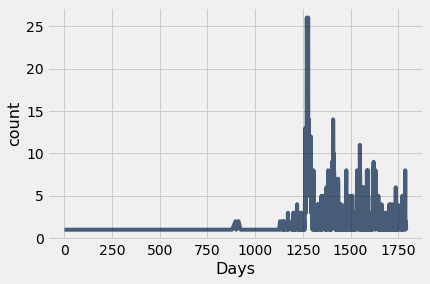

In [13]:
group_0.plot("Days")

In [14]:
group_0.where("count",are.not_equal_to(1))

Days,count
898,2
913,2
1131,2
1145,2
1146,2
1151,2
1172,3
1179,2
1196,2
1200,3


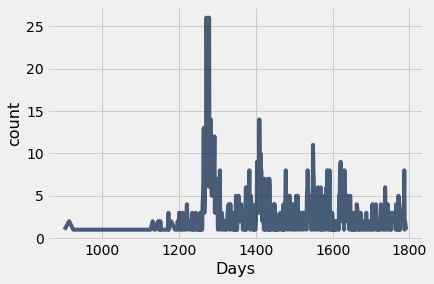

In [15]:
group_0.where("Days",are.above(898)).plot("Days")

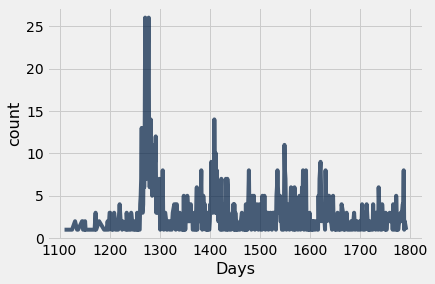

In [16]:
group_0.where("Days",are.above(1100)).plot("Days")

#Maybe we can add another line indicating some important date when some big news or event about Brexit happen, and to see whether it is consistant with this plot.

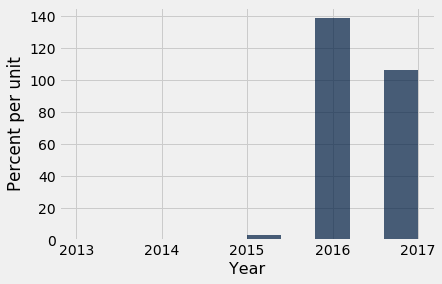

In [17]:
brexit_date.hist("Year")

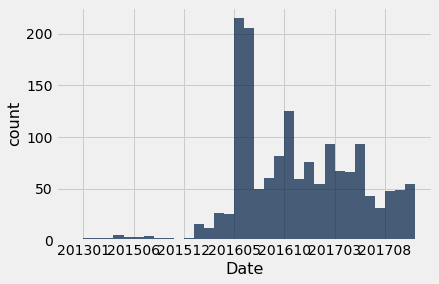

In [18]:
brexit_date.group("Date").bar("Date")

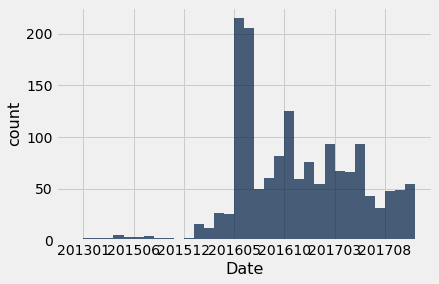

In [19]:
group_1.bar("Date") # Why cannotautofmt_xdate()


#Mabybe R will be a better choice?

# 3. Visualizing Text Data

In [20]:
brexit_date.group("Year")

Year,count
2013,1
2014,4
2015,22
2016,877
2017,674


In [21]:
str_2013 = brexit_date.column("Snippet").item(0)
sub_2013 = brexit_date.column("Subject").item(0)

In [22]:
str_2014 = ""
for i in np.arange(2,6):
    s_2014 = brexit_date.column("Snippet").item(i)
    str_2014 = str_2014 + s_2014

sub_2014 = ""
for i in np.arange(2,6):
    su_2014 = brexit_date.column("Subject").item(i)
    sub_2014 = sub_2014 + su_2014

In [23]:
str_2015 = ""
for i in np.arange(6,28):
    s_2015 = brexit_date.column("Snippet").item(i)
    str_2015 = str_2015 + s_2015
    
sub_2015 = ""
for i in np.arange(6,28):
    su_2015 = brexit_date.column("Subject").item(i)
    sub_2015 = sub_2015 + su_2015

In [24]:
str_2016 = ""
for i in np.arange(28,905):
    s_2016 = brexit_date.column("Snippet").item(i)
    str_2016 = str_2016 + s_2016

sub_2016 = ""
for i in np.arange(28,905):
    su_2016 = brexit_date.column("Subject").item(i)
    sub_2016 = sub_2016 + su_2016

In [25]:
str_2017 = ""
for i in np.arange(905,1578):
    s_2017 = brexit_date.column("Snippet").item(i)
    str_2017 = str_2017 + s_2017
    
sub_2017 = ""
for i in np.arange(905,1578):
    su_2017 = brexit_date.column("Subject").item(i)
    sub_2017 = sub_2017 + su_2017

In [26]:
snippet = Table().with_column("Snippet Each Year", make_array(str_2013,str_2014,str_2015,str_2016,str_2017))
snippet
snippet_text = str_2013 + str_2014 + str_2015 + str_2016 + str_2017

subject = Table().with_column("Subject Each Year", make_array(sub_2013,sub_2014,sub_2015,sub_2016,sub_2017))
subject_text = sub_2013 + sub_2014 + sub_2015 + sub_2016 + sub_2017

In [27]:
#import word_tokenize 
import nltk
from nltk import word_tokenize
import string
nltk.download('punkt')
#make the text lower case
str_2013_kower = str_2013.lower()
str_2014_kower = str_2014.lower()
str_2015_kower = str_2015.lower()
str_2016_kower = str_2016.lower()
str_2017_kower = str_2017.lower()

print(str_2013_kower)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wanghuaixin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
the economy, elections, and how to deal with a new islamist threat: as politicians make their new year resolutions, these are a few items on europe's agenda for 2013.


In [28]:
sub_2013_kower = sub_2013.lower()
sub_2014_kower = sub_2014.lower()
sub_2015_kower = sub_2015.lower()
sub_2016_kower = sub_2016.lower()
sub_2017_kower = sub_2017.lower()

print(sub_2013_kower)

[  elections',   new year']


In [29]:
#Convert the text to a list of tokens
tokens_str_13 = nltk.word_tokenize(str_2013_kower)
tokens_str_14 = nltk.word_tokenize(str_2014_kower)
tokens_str_15 = nltk.word_tokenize(str_2015_kower)
tokens_str_16 = nltk.word_tokenize(str_2016_kower)
tokens_str_17 = nltk.word_tokenize(str_2017_kower)
tokens_str = tokens_str_13 +tokens_str_14+tokens_str_15+tokens_str_16+tokens_str_17
#print first 10 tokens 
tokens_str[:10]

['the', 'economy', ',', 'elections', ',', 'and', 'how', 'to', 'deal', 'with']

In [30]:
tokens_sub_13 = nltk.word_tokenize(sub_2013_kower)
tokens_sub_14 = nltk.word_tokenize(sub_2014_kower)
tokens_sub_15 = nltk.word_tokenize(sub_2015_kower)
tokens_sub_16 = nltk.word_tokenize(sub_2016_kower)
tokens_sub_17 = nltk.word_tokenize(sub_2017_kower)
tokens_sub = tokens_sub_13 +tokens_sub_14+tokens_sub_15+tokens_sub_16+tokens_sub_17
#print first 10 tokens 
tokens_sub[:10]

['[', 'elections', "'", ',', 'new', 'year', "'", ']', '[', ']']

In [31]:
from collections import Counter

count = Counter(tokens_str)
#Array for most common words
most_common_words = [word for word, word_count in Counter(tokens_str).most_common(10)] 
#Frequency of the most common words
frequency = [word_count for word, word_count in Counter(tokens_str).most_common(10)] 
#Make a table for words and their frequencies
frequency_table = Table().with_columns('Words', most_common_words, 'Frequency', frequency)
frequency_table

Words,Frequency
the,1881
",",1262
to,1204
of,759
a,749
and,731
in,547
european,296
for,282
is,269


In [32]:
count = Counter(tokens_sub)
#Array for most common words
most_common_words = [word for word, word_count in Counter(tokens_sub).most_common(10)] 
#Frequency of the most common words
frequency = [word_count for word, word_count in Counter(tokens_sub).most_common(10)] 
#Make a table for words and their frequencies
frequency_table = Table().with_columns('Words', most_common_words, 'Frequency', frequency)
frequency_table

Words,Frequency
',3848
",",2682
[,1577
],1577
and,1514
(,900
),900
great,603
britain,603
withdrawal,603


In [33]:
#starting point for punctuation from python string 
#punctuation is '!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~-'
#iterate over tokens and remove punctuations you find
tokens_str = [''.join(c for c in tokens_str if c not in string.punctuation) for tokens_str in tokens_str] 
#string.punctutation includes all kinds of punctuations
tokens_str = [tokens_str for tokens_str in tokens_str if tokens_str]
tokens_str[:10]

['the', 'economy', 'elections', 'and', 'how', 'to', 'deal', 'with', 'a', 'new']

In [34]:
tokens_sub = [''.join(c for c in tokens_sub if c not in string.punctuation) for tokens_sub in tokens_sub] 
#string.punctutation includes all kinds of punctuations
tokens_sub = [tokens_sub for tokens_sub in tokens_sub if tokens_sub]
tokens_sub[:10]

['elections',
 'new',
 'year',
 'referendums',
 'elections',
 'referendums',
 'referendums',
 'elections',
 'international',
 'trade']

In [35]:
count_str = Counter(tokens_str)
count_str_10 = count_str.most_common(10) # Most common words before removing the stop words
count_str_10

[('the', 1882),
 ('to', 1204),
 ('of', 759),
 ('a', 749),
 ('and', 731),
 ('in', 547),
 ('european', 296),
 ('for', 282),
 ('is', 269),
 ('that', 258)]

In [36]:
count_sub = Counter(tokens_sub)
count_sub_10 = count_sub.most_common(10) # Most common words before removing the stop words
count_sub_10

[('and', 1514),
 ('great', 603),
 ('britain', 603),
 ('withdrawal', 603),
 ('from', 603),
 ('eu', 603),
 ('brexit', 603),
 ('government', 231),
 ('politics', 230),
 ('referendums', 209)]

In [37]:
import nltk
nltk.download('stopwords')
#NTKL contains stopwords for all major languages
#Filter out stopwords
filtered = [w for w in tokens_str if not w in stopwords.words('english')] 
count = Counter(filtered)
count_10= count.most_common(10) 
count_10

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wanghuaixin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('european', 296),
 ('need', 203),
 ('know', 196),
 ('union', 181),
 ('start', 170),
 ('britain', 134),
 ('new', 123),
 ('ü', 121),
 ('british', 113),
 ('vote', 112)]

In [38]:
filtered_sub = [w for w in tokens_sub if not w in stopwords.words('english')] 
count_sub = Counter(filtered_sub)
count_10_sub= count_sub.most_common(10) 
count_10_sub

[('great', 603),
 ('britain', 603),
 ('withdrawal', 603),
 ('eu', 603),
 ('brexit', 603),
 ('government', 231),
 ('politics', 230),
 ('referendums', 209),
 ('international', 203),
 ('united', 181)]

In [39]:
#We will do stemming using NLTK's Porter Stemmer.
from nltk.stem.porter import PorterStemmer

stemmed = PorterStemmer()

In [40]:
from nltk.stem.porter import PorterStemmer
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

#We pass the filetered tokens and the type of stemmer to stem_token function
stemmed = stem_tokens(filtered, PorterStemmer())
count1 = Counter(stemmed)
count_10 = count1.most_common(10) #Most common words after removing the stop words
count_10

[('european', 300),
 ('need', 219),
 ('know', 198),
 ('union', 181),
 ('start', 181),
 ('vote', 142),
 ('leav', 141),
 ('britain', 134),
 ('new', 123),
 ('ü', 121)]

In [41]:
count = Counter(stemmed)
#Array for most common words
most_common_words = [word for word, word_count in Counter(stemmed).most_common(10)] 
#Frequency of the most common words
frequency = [word_count for word, word_count in Counter(stemmed).most_common(10)] 
#Make a table for words and their frequencies
frequency_table = Table().with_columns('Words', most_common_words, 'Frequency', frequency)
frequency_table

Words,Frequency
european,300
need,219
know,198
union,181
start,181
vote,142
leav,141
britain,134
new,123
ü,121


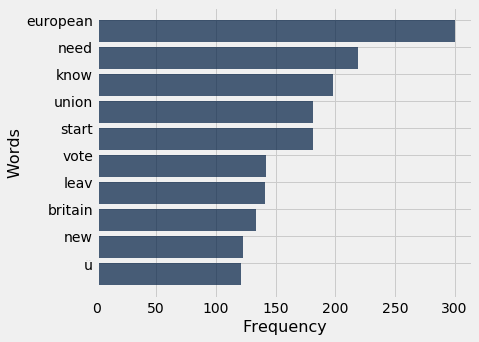

In [42]:
frequency_table.barh('Words', 'Frequency')

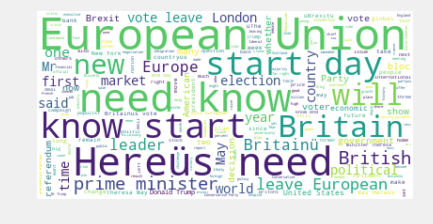

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#generating and formatting of wordcloud from the book text
wordcloud = WordCloud(background_color='white',
                      max_words=200,
                      max_font_size=60, 
                      random_state=42).generate(snippet_text) 


plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

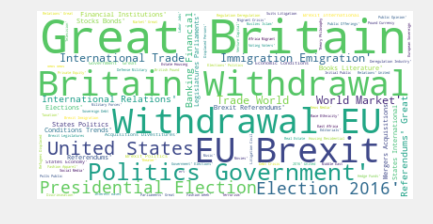

In [44]:
wordcloud_sub = WordCloud(background_color='white',
                      max_words=200,
                      max_font_size=60, 
                      random_state=42).generate(subject_text) 


plt.imshow(wordcloud_sub,interpolation='bilinear')
plt.axis('off')
plt.show()

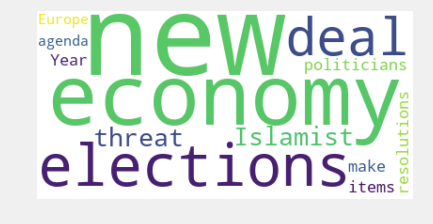

Figure 1: The Wordcloud of Snippet of Year 2013


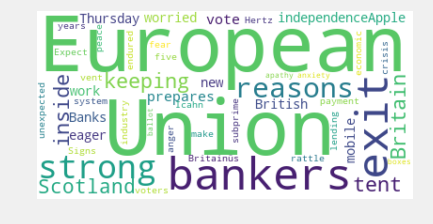

Figure 2: The Wordcloud of Snippet of Year 2014


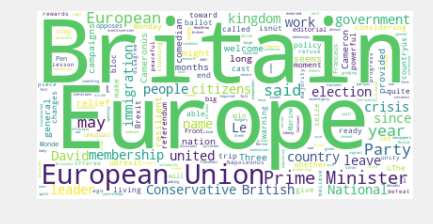

Figure 3: The Wordcloud of Snippet of Year 2015


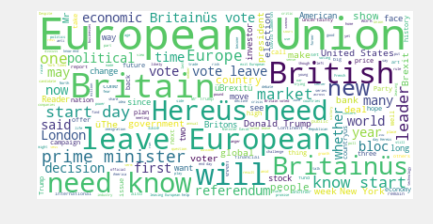

Figure 4: The Wordcloud of Snippet of Year 2016


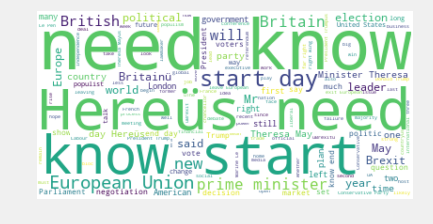

Figure 5: The Wordcloud of Snippet of Year 2017


In [45]:
for i in np.arange(0,5):
    wordcloud = WordCloud(background_color='white',
                          max_words=400,
                          max_font_size=120, 
                          random_state=42).generate(snippet.column(0).item(i)) 

    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
    print ("Figure"+" "+str(i+1)+":"+" "+"The Wordcloud of Snippet of Year"+" "+ str(i+2013))

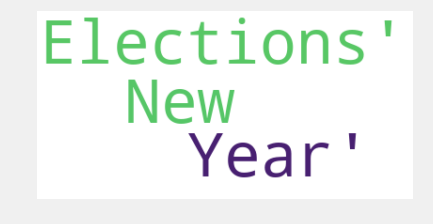

Figure 1: The Wordcloud of Subject of Year 2013


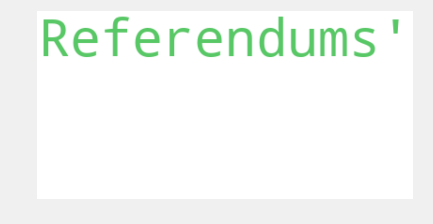

Figure 2: The Wordcloud of Subject of Year 2014


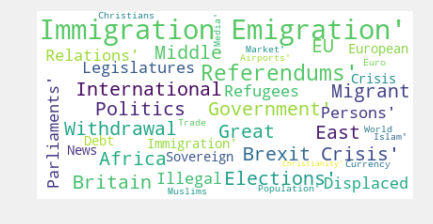

Figure 3: The Wordcloud of Subject of Year 2015


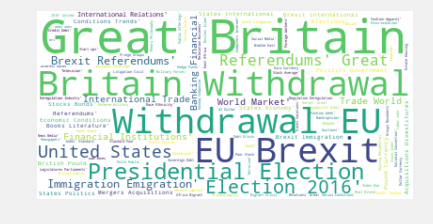

Figure 4: The Wordcloud of Subject of Year 2016


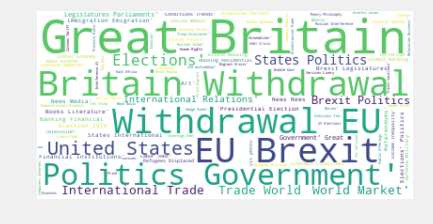

Figure 5: The Wordcloud of Subject of Year 2017


In [46]:
for i in np.arange(0,5):
    wordcloud = WordCloud(background_color='white',
                          max_words=400,
                          max_font_size=120, 
                          random_state=42).generate(subject.column(0).item(i)) 

    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
    print ("Figure"+" "+str(i+1)+":"+" "+"The Wordcloud of Subject of Year"+" "+ str(i+2013))

# 4. Standpoint of NY Time

In [51]:
editor = brexit_date.where("Type","Editorial")
editor.show(3)

Days,Headline,Location,Snippet,URL,Subject,Date in Number,Type,ID,Year,Month,Date
541,David Cameronüs Losing Battle,"[ Great Britain', Luxembourg', Europe']",The British prime ministerüs case against Jean-Claude Ju ...,https://www.nytimes.com/2014/06/26/opinion/mr-camerons-l ...,"[ Elections', Editorials']",41815.0,Editorial,53aaa68638f0d86af25be96a,2014,6,201406
1131,Everyone Loses if Britain Exits the E.U.,[ Great Britain'],A British exit would deal a serious blow to a European U ...,https://www.nytimes.com/2016/02/05/opinion/everyone-lose ...,"[ Editorials', Legislatures and Parliaments', Great ...",42405.0,Editorial,56b3ffc138f0d84a7b07051b,2016,2,201602
1264,Britainüs Dangerous Urge to Go It Alone,"[ Europe', Great Britain']","If voters approve a üBrexitü from the European Union, it ...",https://www.nytimes.com/2016/06/17/opinion/britains-dang ...,"[ Editorials', Referendums', Great Britain Withdraw ...",42538.0,Editorial,5763a4f138f0d83da36e0652,2016,6,201606


In [52]:
editor.column("Date")

array(['201406', '201602', '201606', '201606', '201606', '201606',
       '201606', '201606', '201607', '201607', '201607', '201607',
       '201609', '201610', '201610', '201611', '201611', '201611',
       '201612', '201612', '201612', '201701', '201701', '201701',
       '201703', '201703', '201703', '201704', '201704', '201706',
       '201706', '201706', '201707', '201711', '201711'],
      dtype='<U32')

In [90]:
editors_sp_text = ""
for i in np.arange(0,editor.num_rows):
    editor_sp_str = editor.column("Snippet").item(i)
    editors_sp_text = editors_sp_text + editor_sp_str

editors_sp_text

'The British prime ministerüs case against Jean-Claude Juncker could well boomerang and feed anti-E.U. sentiments in Britain.A British exit would deal a serious blow to a European Union already battered by an economic crisis and an immigration crisis.If voters approve a üBrexitü from the European Union, it would be a blow to the British economy and to hopes for greater cooperation across the Continent.A vote that weakens Europe and reshapes Britainüs role as a leader of the West.One lesson for the United States is to try to see economic problems clearly and not overreact.The alliances that have helped keep the peace in Europe have been shaken by Britainüs stunning vote.Despite Brexit, Britain must continue to play a major role in NATO.The vote in Britain to leave the European Union is bad news for the French, who face economic strains and terrorist threats that feed their own nationalist movement.Addressing Europeüs big challenges will require more unity, not less.On this Fourth of Jul

In [88]:
editors_hl_text = ""
for i in np.arange(0,editor.num_rows):
    editor_hl_str = editor.column("Headline").item(i)
    editors_hl_text = editors_hl_text + editor_hl_str

editors_hl_text

'David Cameronüs Losing BattleEveryone Loses if Britain Exits the E.U.Britainüs Dangerous Urge to Go It AloneBritain Leaves on a Cry of Anger and FrustrationAmerican Anxieties, Mirrored in BritainThe Security Consequences of BrexitBritainüs Importance to Europeüs SecurityHope Takes a Beating in France, TooHow to Revive the Promise of the European UnionFreedom, Fireworks and BrexitTheresa May to the RescueA Brexit Economic SlumpIn Britain, Soul-Searching on üBrexitüThe Countdown Clock on BrexitThe E.U. Should Stick to Its Guns on BrexitParliamentüs Power Over BrexitThe World Waits and Wonders About Donald TrumpNew Presidents Who Tilt Toward RussiaRussian Meddling and Europeüs ElectionsThe Fantasy Version of BrexitThe Scope of Hate in 2016Theresa May Puts the Exit in BrexitParliament Is Back in the Brexit GameWhen Donald Trump Met Theresa MayA Dent in Europeüs PopulismScottish Independence Can WaitThe Complex Cost of Brexit Gets ClearerStrengthening Britainüs Hand on BrexitThe Suspense I

In [105]:
editors_text = editors_hl_text + editors_sp_text
editors_text

'David Cameronüs Losing BattleEveryone Loses if Britain Exits the E.U.Britainüs Dangerous Urge to Go It AloneBritain Leaves on a Cry of Anger and FrustrationAmerican Anxieties, Mirrored in BritainThe Security Consequences of BrexitBritainüs Importance to Europeüs SecurityHope Takes a Beating in France, TooHow to Revive the Promise of the European UnionFreedom, Fireworks and BrexitTheresa May to the RescueA Brexit Economic SlumpIn Britain, Soul-Searching on üBrexitüThe Countdown Clock on BrexitThe E.U. Should Stick to Its Guns on BrexitParliamentüs Power Over BrexitThe World Waits and Wonders About Donald TrumpNew Presidents Who Tilt Toward RussiaRussian Meddling and Europeüs ElectionsThe Fantasy Version of BrexitThe Scope of Hate in 2016Theresa May Puts the Exit in BrexitParliament Is Back in the Brexit GameWhen Donald Trump Met Theresa MayA Dent in Europeüs PopulismScottish Independence Can WaitThe Complex Cost of Brexit Gets ClearerStrengthening Britainüs Hand on BrexitThe Suspense I

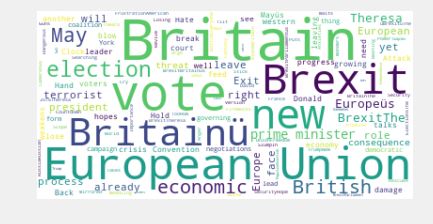

In [92]:
wordcloud_edi = WordCloud(background_color='white',
                      max_words=200,
                      max_font_size=60, 
                      random_state=42).generate(editors_text) 


plt.imshow(wordcloud_edi,interpolation='bilinear')
plt.axis('off')
plt.show()

In [117]:
editors_text_kower = editors_text.lower()
editors_text_l = nltk.word_tokenize(editors_text_kower)

count = Counter(editors_text_l)
#Array for most common words
most_common_words = [word for word, word_count in Counter(editors_text_l).most_common(20)] 
#Frequency of the most common words
frequency = [word_count for word, word_count in Counter(editors_text_l).most_common(20)] 
#Make a table for words and their frequencies
frequency_table = Table().with_columns('Words', most_common_words, 'Frequency', frequency)
frequency_table

editors_text_l = [''.join(c for c in editors_text_l if c not in string.punctuation) for editors_text_l in editors_text_l] 
#string.punctutation includes all kinds of punctuations
editors_text_l = [editors_text_l for editors_text_l in editors_text_l if editors_text_l]
editors_text_l[:10]

count_e_text = Counter(editors_text_l)
count_e_text_10 = count_e_text.most_common(10) # Most common words before removing the stop words
count_e_text_10

filtered_e = [w for w in editors_text_l if not w in stopwords.words('english')] 
count = Counter(filtered_e)
count_10= count.most_common(10) 
count_10

stemmed = stem_tokens(filtered_e, PorterStemmer())
count1 = Counter(stemmed)
count_50 = count1.most_common(50) #Most common words after removing the stop words
count_50



[('european', 11),
 ('britain', 8),
 ('brexit', 7),
 ('britainü', 6),
 ('union', 6),
 ('new', 6),
 ('leav', 5),
 ('may', 5),
 ('econom', 5),
 ('british', 5),
 ('prime', 5),
 ('would', 5),
 ('vote', 5),
 ('minist', 5),
 ('elect', 5),
 ('europeü', 4),
 ('brexitth', 4),
 ('lose', 3),
 ('exit', 3),
 ('theresa', 3),
 ('terrorist', 3),
 ('see', 3),
 ('threat', 3),
 ('alreadi', 3),
 ('europ', 3),
 ('role', 3),
 ('face', 3),
 ('yet', 3),
 ('need', 3),
 ('govern', 3),
 ('process', 3),
 ('eu', 2),
 ('donald', 2),
 ('presid', 2),
 ('hate', 2),
 ('back', 2),
 ('mayü', 2),
 ('convent', 2),
 ('hold', 2),
 ('could', 2),
 ('well', 2),
 ('feed', 2),
 ('blow', 2),
 ('voter', 2),
 ('economi', 2),
 ('hope', 2),
 ('weaken', 2),
 ('leader', 2),
 ('lesson', 2),
 ('play', 2)]

In [120]:
e_str = ""
for i in np.arange(0,len(stemmed)):
    word = editors_text_l[i] + " "
    e_str = e_str + word

e_str

'david cameronüs losing battleeveryone loses if britain exits the eubritainüs dangerous urge to go it alonebritain leaves on a cry of anger and frustrationamerican anxieties mirrored in britainthe security consequences of brexitbritainüs importance to europeüs securityhope takes a beating in france toohow to revive the promise of the european unionfreedom fireworks and brexittheresa may to the rescuea brexit economic slumpin britain soulsearching on übrexitüthe countdown clock on brexitthe eu should stick to its guns on brexitparliamentüs power over brexitthe world waits and wonders about donald trumpnew presidents who tilt toward russiarussian meddling and europeüs electionsthe fantasy version of brexitthe scope of hate in 2016theresa may puts the exit in brexitparliament is back in the brexit gamewhen donald trump met theresa maya dent in europeüs populismscottish independence can waitthe complex cost of brexit gets clearerstrengthening britainüs hand on brexitthe suspense is almost 

In [125]:
eitor_text_no_mostcommon = "david cameronüs losing battleeveryone loses if  exits the euüs dangerous urge to go it alone leaves on a cry of anger and frustrationamerican anxieties mirrored in the security consequences of üs importance to europeüs securityhope takes a beating in france toohow to revive the promise of the  freedom fireworks and theresa may to the rescuea  economic slumpin  soulsearching on üüthe countdown clock on the eu should stick to its guns on parliamentüs power over the world waits and wonders about donald trump presidents who tilt toward russiarussian meddling and europeüs electionsthe fantasy version of the scope of hate in 2016theresa may puts the exit in parliament is back in the  gamewhen donald trump met theresa maya dent in europeüs populismscottish independence can waitthe complex cost of  gets clearerstrengthening üs hand on the suspense is almost too much for the frenchanother terrorist attack and more agony in  in disarraymore doubts are raised over mrs mayüs leadership sees üs threats more clearlyconstitutional convention thanks but no thanksms merkel struggles to hold germany togetherthe british prime ministerüs case against jeanclaude juncker could well boomerang and feed antieu sentiments in a british exit would deal a serious blow to a   already battered by an economic crisis and an immigration crisisif voters approve a üü from the   it would be a blow to the british economy and to hopes for greater cooperation across the continenta vote that weakens europe and reshapes üs role as a leader of the westone lesson for the united states is to try to see economic problems clearly and not overreactthe alliances that have helped keep the peace in europe have been shaken by üs stunning votedespite   must continue to play a major role in natothe vote in  to leave the   is bad s for the french who face economic strains and terrorist threats that feed their own nationalist movementaddressing europeüs big challenges will require more unity not lesson this fourth of july perhaps americans should proclaim another break with  this time with its misguided vote to turn back the clockthe  prime minister faces the tough task of creating a future for  outside the  it is up to üs  prime minister theresa may and her team to come up with a strategy to minimize the economic damagemonths after the vote to leave the   britons have yet to work out the details and consider all of the consequences has a lot to lose in leaving the   and a twoyear limit on talks further weakens an already shaky hand should not be allowed to cherrypick its membership rulesa court decision leads to uncertainty about üs departure from the   but it does add legal clarity to the nonbinding votethe presidentelect would do well to recognize the profound concern of western democracies used to seeing america as a beacon for progress and stabilityelections in"

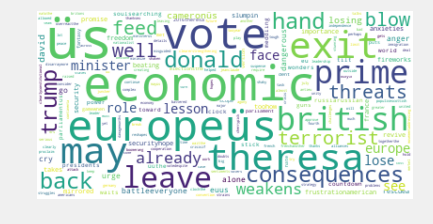

In [126]:
wordcloud_edi_k = WordCloud(background_color='white',
                      max_words=200,
                      max_font_size=60, 
                      random_state=42).generate(eitor_text_no_mostcommon) 


plt.imshow(wordcloud_edi_k,interpolation='bilinear')
plt.axis('off')
plt.show()

# 5. Comparison between Different Types

In [165]:
def wordcloud(Type):
    texts = ""
    for i in np.arange(0,brexit_date.where("Type",Type).num_rows):
        text_s = brexit_date.where("Type",Type).column("Snippet").item(i)
        text_h = brexit_date.where("Type",Type).column("Headline").item(i)
        texts = texts + text_h + text_s
    wordcloud_edi_k = WordCloud(background_color='white',
                      max_words=200,
                      max_font_size=60, 
                      random_state=42).generate(texts) 


    plt.imshow(wordcloud_edi_k,interpolation='bilinear')
    plt.axis('off')
    plt.show()
    print ("Worldcloud for" +" " + Type)

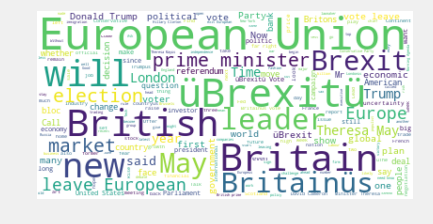

Worldcloud for News


In [166]:
wordcloud("News")

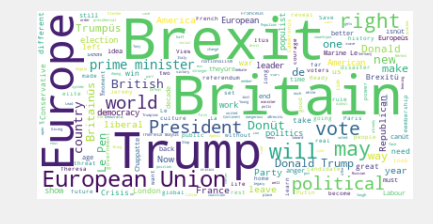

Worldcloud for Op-Ed


In [167]:
wordcloud("Op-Ed")

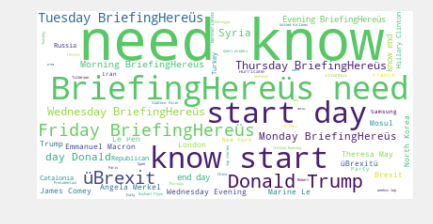

Worldcloud for briefing


In [168]:
wordcloud("briefing")

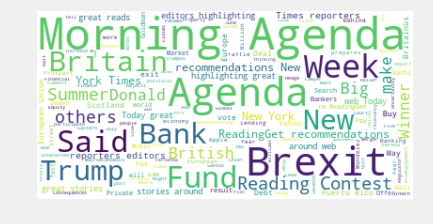

Worldcloud for Blog


In [169]:
wordcloud("Blog")

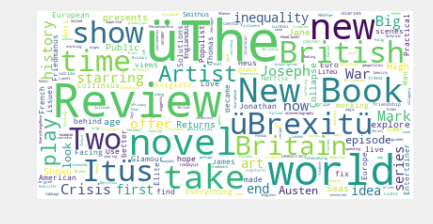

Worldcloud for Review


In [170]:
wordcloud("Review")

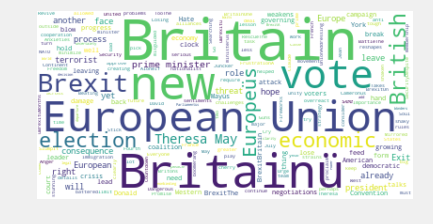

Worldcloud for Editorial


In [171]:
wordcloud("Editorial")